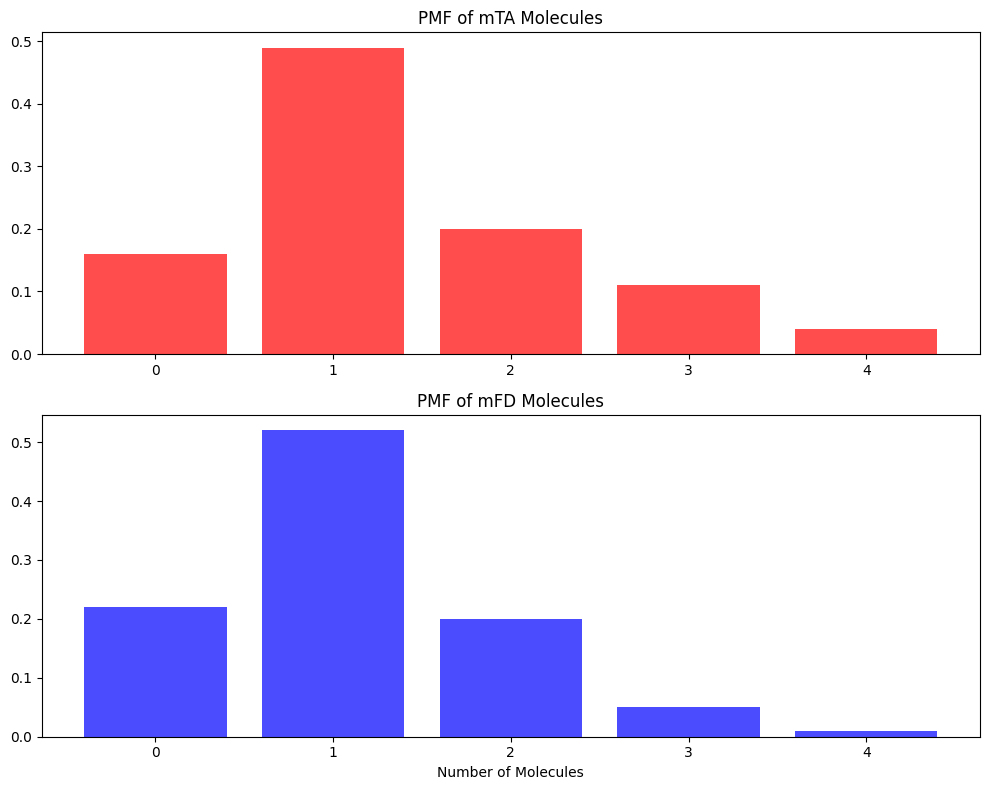

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fix random seed
np.random.seed(123)

###### Parameters ######
r = 1/(2.5*24)
N0 = 18.0
lam = 1/30
d = 0.3
gamma = 0.4

steps = 1200     # Reaction steps per trajectory
cycles = 100    # Number of trajectories

# Initial values
mTA0 = 0
mFD0 = 0

# Storage arrays
mTA_final = np.zeros(cycles)
mFD_final = np.zeros(cycles)

###### Gillespie Simulation ######
for i in range(cycles):
    mTA = mTA0
    mFD = mFD0
    for j in range(steps):
        # Reaction rates
        rate1 = r * N0                      # ∅ → mTA
        rate2 = max((lam - d) * mTA, 0)  # mTA net production
        rate3 = d * mTA                   # mTA → mFD
        rate4 = gamma * mFD               # mFD → ∅

        rates = np.array([rate1, rate2, rate3, rate4])
        R = np.sum(rates)
        
        if R == 0:
            break  # No reactions possible
        
        # Choose reaction
        reaction = np.random.choice(4, p=rates/R)
        
        # Update molecule counts
        if reaction == 0:      # ∅ → mTA
            mTA += 1
        elif reaction == 1:    # mTA net production
            mTA += 1
        elif reaction == 2:    # mTA → mFD
            mTA -= 1
            mFD += 1
        elif reaction == 3:    # mFD → ∅
            mFD -= 1
    
    # Store final counts
    mTA_final[i] = mTA
    mFD_final[i] = mFD

###### PMF Calculation ######
def compute_pmf(data):
    unique, counts = np.unique(data, return_counts=True)
    pmf = counts / len(data)
    return unique, pmf

mTA_values, mTA_pmf = compute_pmf(mTA_final)
mFD_values, mFD_pmf = compute_pmf(mFD_final)

###### Plot PMF ######
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].bar(mTA_values, mTA_pmf, color='red', alpha=0.7)
axs[1].bar(mFD_values, mFD_pmf, color='blue', alpha=0.7)

axs[0].set_title('PMF of mTA Molecules')
axs[1].set_title('PMF of mFD Molecules')
axs[1].set_xlabel("Number of Molecules")

plt.tight_layout()
plt.show()